In [1]:
import numpy as np
import matplotlib.pyplot as plt

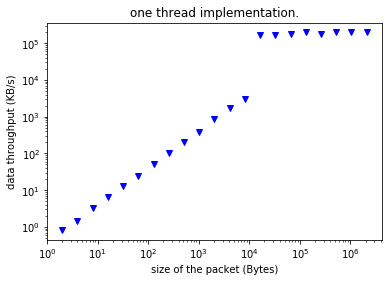

In [2]:
# Xillybus bandwidth test.
result = open("res.txt", 'r')
data = result.readlines()
x1 = np.zeros((len(data)-1));
y1 = np.zeros(x1.shape);
i = 0
for line in data[:-1]:
    clear = line.replace("\r", "").replace("\n", "").split(",")
    x1[i] = clear[0]
    y1[i] = clear[1]
    i= i + 1
    
plt.plot(x1, y1/1000, 'bv')
plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of the packet (Bytes)")
plt.ylabel("data throughput (KB/s)")
plt.title("one thread implementation.")
plt.show()
result.close()

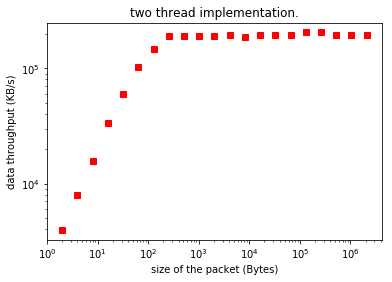

In [3]:

result = open("res_thread.txt", 'r')
data = result.readlines()
x2 = np.zeros((len(data)-1));
y2 = np.zeros(x2.shape);
i = 0
for line in data[:-1]:
    clear = line.replace("\r", "").replace("\n", "").split(",")
    x2[i] = clear[0]
    y2[i] = clear[1]
    i= i + 1
    
plt.plot(x2, y2/1000, 'rs')
plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of the packet (Bytes)")
plt.ylabel("data throughput (KB/s)")
plt.title("two thread implementation.")
plt.show()
result.close()

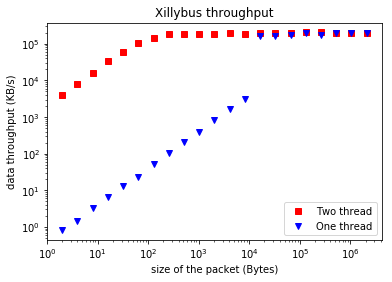

In [4]:
a, = plt.plot(x2, y2/1000, 'rs', label='Two thread')
b, = plt.plot(x1, y1/1000, 'bv', label='One thread')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of the packet (Bytes)")
plt.ylabel("data throughput (KB/s)")
plt.title("Xillybus throughput")
plt.show()

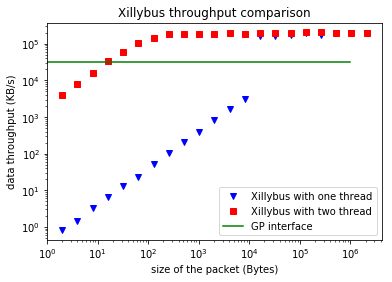

In [5]:
# DMA (using GPI0 AXI Port) not too much point because we need to rebuild the bitfile each time.
b_gpio_x = np.array([1024, 2048, 4096, 8196, 16384])
b_gpio_y = np.array([32000000, 32000000, 32500000, 32500000, 32500000]) #bytes/sec
a, = plt.plot(x1, y1/1000, 'bv', label='Xillybus with one thread')
b, = plt.plot(x2, y2/1000, 'rs', label='Xillybus with two thread')
c, = plt.plot([0.0, 1000000], [32500, 32500], 'g-', label='GP interface')

plt.legend(handles=[a,b,c])


plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of the packet (Bytes)")
plt.ylabel("data throughput (KB/s)")
plt.title("Xillybus throughput comparison")
plt.show()

***
Now we will look at parrallele accces :

* without concurrency.

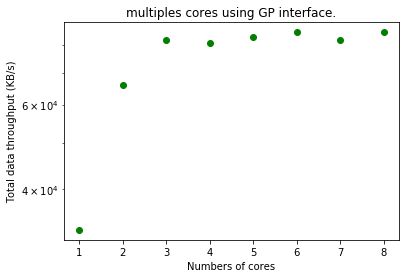

In [6]:
result = open("parr.txt", 'r')
data = result.readlines()
x_in = np.zeros(len(data) - 1)
y_in = np.zeros(x_in.shape)
i = 0
for line in data[:-1]:
    clear = line.replace("\r", "").replace("\n", "").split(",")
    x_in[i] = clear[0]
    y_in[i] = clear[1]
    i= i + 1

x_par, pos = np.unique(x_in, return_inverse=True)
y_par = np.zeros(x_par.shape)
for i in np.unique(pos):
    indices = np.where(pos == i)[0]
    y_par[i] = np.mean(y_in[indices])
    
plt.plot(x_par, y_par/1000, 'go')

plt.yscale('log', basey=10)
plt.xlabel("Numbers of cores")
plt.ylabel("Total data throughput (KB/s)")
plt.title("multiples cores using GP interface.")
plt.show()
result.close()

 * with read concurrency

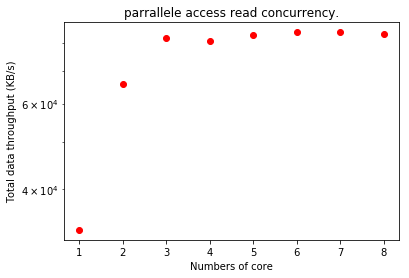

In [7]:
result = open("parr_rc.txt", 'r')
data = result.readlines()
x_in = np.zeros(len(data) - 1)
y_in = np.zeros(x_in.shape)
i = 0
for line in data[:-1]:
    clear = line.replace("\r", "").replace("\n", "").split(",")
    x_in[i] = clear[0]
    y_in[i] = clear[1]
    i= i + 1

x_parc, pos = np.unique(x_in, return_inverse=True)
y_parc = np.zeros(x_parc.shape)
for i in np.unique(pos):
    indices = np.where(pos == i)[0]
    y_parc[i] = np.mean(y_in[indices])
    
plt.plot(x_parc, y_parc/1000, 'ro')

plt.yscale('log', basey=10)
plt.xlabel("Numbers of core")
plt.ylabel("Total data throughput (KB/s)")
plt.title("parrallele access read concurrency.")
plt.show()
result.close()

 * with write concurrency

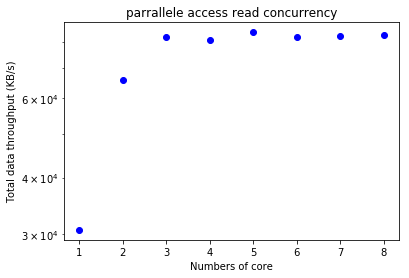

In [8]:
result = open("parr_wc.txt", 'r')
data = result.readlines()
x_in = np.zeros(len(data) - 1)
y_in = np.zeros(x_in.shape)
i = 0
for line in data[:-1]:
    clear = line.replace("\r", "").replace("\n", "").split(",")
    x_in[i] = clear[0]
    y_in[i] = clear[1]
    i= i + 1

x_parwc, pos = np.unique(x_in, return_inverse=True)
y_parwc = np.zeros(x_parc.shape)
for i in np.unique(pos):
    indices = np.where(pos == i)[0]
    y_parwc[i] = np.mean(y_in[indices])
    
plt.plot(x_parwc, y_parwc/1000, 'bo')

plt.yscale('log', basey=10)
plt.xlabel("Numbers of core")
plt.ylabel("Total data throughput (KB/s)")
plt.title("parrallele access read concurrency")
plt.show()
result.close()

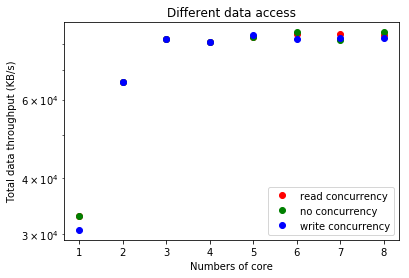

In [9]:
a, = plt.plot(x_parc, y_parc/1000, 'ro', label='read concurrency')
b, = plt.plot(x_par, y_par/1000, 'go', label='no concurrency')
c, = plt.plot(x_parwc, y_parwc/1000, 'bo', label='write concurrency')
plt.legend(handles=[a,b,c])

plt.yscale('log', basey=10)
plt.xlabel("Numbers of core")
plt.ylabel("Total data throughput (KB/s)")
plt.title("Different data access")
plt.show()